In [22]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from base import *
from metrics import *
from sklearn.datasets import make_classification
from itertools import product

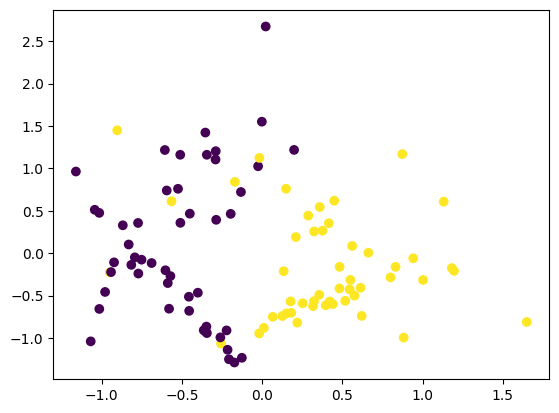

In [23]:
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [24]:
X_train,X_test = X[:70],X[70:]
Y_train,Y_test = y[:70],y[70:]
x_train = pd.DataFrame(X_train,columns=['f1','f2'])
x_test = pd.DataFrame(X_test,columns=['f1','f2'])
y_train = pd.Series(Y_train,name='Y')
y_test = pd.Series(Y_test,name='Y')

In [25]:
max_depth = 10
depth_accuracys_test = []
for i in range(1,max_depth):
    Decision_tree = DecisionTree('mse',i)
    Decision_tree.fit(x_train,y_train)
    y_pred = pd.Series(Decision_tree.predict(x_test))
    depth_accuracys_test.append(accuracy(y_pred,y_test))

print(depth_accuracys_test)


[0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


In [ ]:
# Calculate precision and recall for class 1
precision_class_1 = precision(y_pred, y_test, cls=1)
recall_class_1 = recall(y_pred, y_test, cls=1)

# Calculate precision and recall for class 0
precision_class_0 = precision(y_pred, y_test, cls=0)
recall_class_0 = recall(y_pred, y_test, cls=0)

print(f'Precision for Class 1: {precision_class_1}')
print(f'Recall for Class 1: {recall_class_1}')
print(f'Precision for Class 0: {precision_class_0}')
print(f'Recall for Class 0: {recall_class_0}')


Precision for Class 1: 0.9473684210526315
Recall for Class 1: 1.0
Precision for Class 0: 1.0
Recall for Class 0: 0.9166666666666666


In [ ]:
max_depth = 10
depth_accuracys_train = []

for i in range(1,max_depth):
    Decision_tree = DecisionTree('mse',i)
    Decision_tree.fit(x_train,y_train)
    y_pred = pd.Series(Decision_tree.predict(x_train))
    depth_accuracys_train.append(accuracy(y_pred,y_train))

print(depth_accuracys_train)

[0.9, 0.9, 0.9285714285714286, 0.9428571428571428, 0.9571428571428572, 0.9571428571428572, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714]


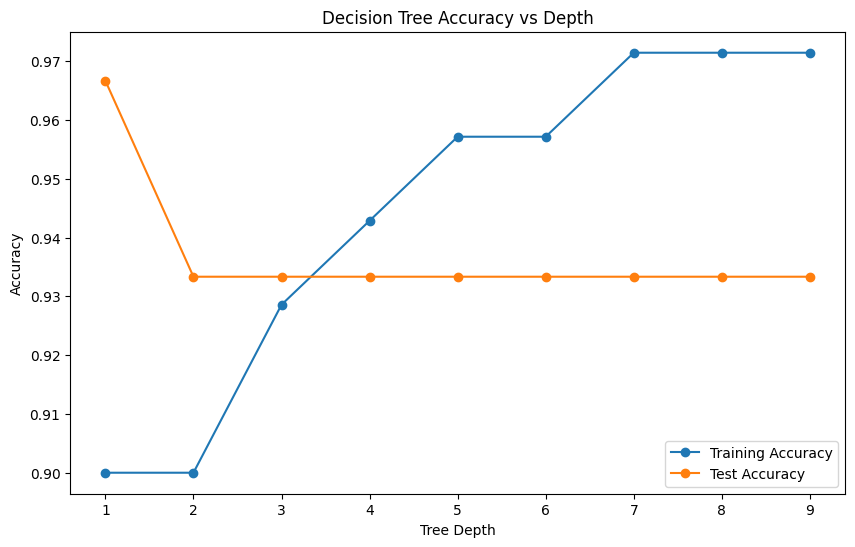

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_depth), depth_accuracys_train, marker='o', label='Training Accuracy')
plt.plot(range(1, max_depth), depth_accuracys_test, marker='o', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Depth')
plt.legend()
plt.show()

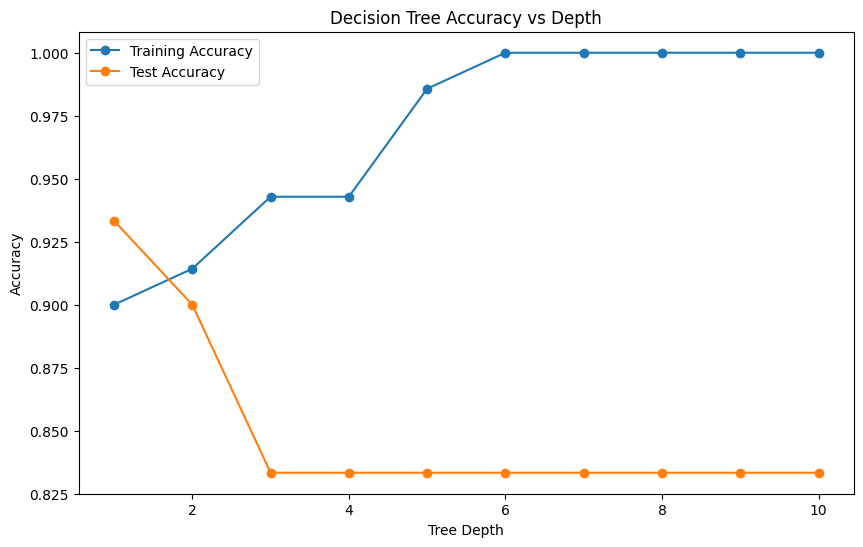

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create a synthetic dataset for classification
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lists to store accuracy scores
depths = list(range(1, 11))
accuracies_train = []
accuracies_test = []

# Loop through depths and train Decision Tree classifiers
for depth in depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Train the model on the training set
    decision_tree_classifier.fit(X_train, y_train)

    # Make predictions on the training set
    y_pred_train = decision_tree_classifier.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracies_train.append(accuracy_train)

    # Make predictions on the testing set
    y_pred_test = decision_tree_classifier.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies_train, marker='o', label='Training Accuracy')
plt.plot(depths, accuracies_test, marker='o', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Depth')
plt.legend()
plt.show()


In [ ]:
import numpy as np
# Define the number of folds (k)
k = 5

# Initialize lists to store predictions and accuracies
predictions = {}
accuracies = []

# Calculate the size of each fold
fold_size = len(X) // k

# Perform k-fold cross-validation
for i in range(k):
    # Split the data into training and test sets
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    test_set = X[test_start:test_end]
    test_labels = y[test_start:test_end]
    
    training_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    training_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)
    training_set = pd.DataFrame(training_set,columns=['f1','f2'])
    training_labels = pd.Series(training_labels)
    
    # Train the model
    dt_classifier = DecisionTree('mse',3)
    dt_classifier.fit(training_set, training_labels)
    
    # Make predictions on the validation set
    fold_predictions = dt_classifier.predict(pd.DataFrame(test_set,columns=['f1','f2']))
    
    # Calculate the accuracy of the fold
    fold_accuracy = np.mean(fold_predictions == test_labels)
    
    # Store the predictions and accuracy of the fold
    predictions[i] = fold_predictions
    accuracies.append(fold_accuracy)

# Print the predictions and accuracies of each fold
for i in range(k):
    print("Fold {}: Accuracy: {:.4f}".format(i+1, accuracies[i]))

Fold 1: Accuracy: 0.9000
Fold 2: Accuracy: 0.9000
Fold 3: Accuracy: 0.8500
Fold 4: Accuracy: 0.8000
Fold 5: Accuracy: 0.9500


In [ ]:
hyperparameters = {}
hyperparameters['max_depth'] = [1,2,3,4,5]
hyperparameters['min_samples_split'] = [2,3,4,5,6,7,8]

outer_loop_accuracies = []
inner_loop_accuracies = []

results= {}
inner_count = 0
outer_count = 0
overall_count = 0

k = 5

outer_fold_size = len(X)//k

for i in range(k):
    test_start = i * outer_fold_size
    test_end = (i + 1) * outer_fold_size
    test_set = X[test_start:test_end]
    test_labels = y[test_start:test_end]
    
    train_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    train_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)
    
    inner_fold_size = len(train_set)//k
    
    for j in range(k):
        val_start = j * inner_fold_size
        val_end = (j + 1) * inner_fold_size
        val_set = train_set[val_start:val_end]
        val_labels = train_labels[val_start:val_end]
        
        training_set = np.concatenate((train_set[:val_start], train_set[val_end:]), axis=0)
        training_labels = np.concatenate((train_labels[:val_start], train_labels[val_end:]), axis=0)
        
        
        for max_depth_split,min_sample_split in product(hyperparameters['max_depth'],hyperparameters['min_samples_split']):
            dt_classifier = DecisionTree('mse',max_depth= max_depth_split,min_samples=min_sample_split)
            dt_classifier.fit(pd.DataFrame(training_set,columns=['f1','f2']),pd.Series(training_labels))
            val_pred = dt_classifier.predict(pd.DataFrame(val_set,columns=['f1','f2']))
            val_accuracy = accuracy(pd.Series(val_pred),pd.Series(val_labels))
            results[overall_count] = {'outer_fold': outer_count, 
                                      'inner_fold': inner_count, 
                                      'max_depth': max_depth_split, 
                                      'min_samples_split' : min_sample_split,
                                      'val_accuracy': val_accuracy}
            overall_count += 1
        inner_count+=1
    outer_count+=1

In [ ]:
overall_results = pd.DataFrame(results).T
overall_results

,outer_fold,inner_fold,max_depth,min_samples_split,val_accuracy
0,0.0,0.0,1.0,2.0,0.8125
1,0.0,0.0,1.0,3.0,0.8125
2,0.0,0.0,1.0,4.0,0.8125
3,0.0,0.0,1.0,5.0,0.8125
4,0.0,0.0,1.0,6.0,0.8125
...,...,...,...,...,...
870,4.0,24.0,5.0,4.0,0.8750
871,4.0,24.0,5.0,5.0,0.8750
872,4.0,24.0,5.0,6.0,0.8750
873,4.0,24.0,5.0,7.0,0.8750


In [ ]:
outer_fold = 5
outer_fold_df = overall_results.query('outer_fold == @outer_fold')
outer_fold_df.groupby(['max_depth', 'min_samples_split', 'criterion']).mean()['val_accuracy'].sort_values(ascending=False).head(10)

In [30]:

# Define hyperparameters for decision tree
hyperparameters = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5]
}

# Initialize lists to store results
outer_fold_accuracies = []
outer_fold_opt_depth = []
outer_fold_opt_minsamples = []
# Perform outer k-fold cross-validation
k = 5
outer_fold_size = len(X) // k

for outer_fold in range(k):
    # Split data into outer training and test sets
    test_start = outer_fold * outer_fold_size
    test_end = (outer_fold + 1) * outer_fold_size
    test_set = X[test_start:test_end]
    test_labels = y[test_start:test_end]

    train_set = np.concatenate((X[:test_start], X[test_end:]), axis=0)
    train_labels = np.concatenate((y[:test_start], y[test_end:]), axis=0)

    # Initialize variables for optimal hyperparameters and accuracy
    best_max_depth = None
    best_min_samples_split = None
    best_accuracy = 0.0

    # Perform inner k-fold cross-validation to find optimal hyperparameters
    inner_fold_size = len(train_set) // k

    for inner_fold in range(k):
        val_start = inner_fold * inner_fold_size
        val_end = (inner_fold + 1) * inner_fold_size
        val_set = train_set[val_start:val_end]
        val_labels = train_labels[val_start:val_end]
        training_set = np.concatenate((train_set[:val_start], train_set[val_end:]), axis=0)
        training_labels = np.concatenate((train_labels[:val_start], train_labels[val_end:]), axis=0)
        # Grid search over hyperparameters
        for max_depth, min_samples_split in product(hyperparameters['max_depth'], hyperparameters['min_samples_split']):
            dt_classifier = DecisionTree('mse', max_depth=max_depth, min_samples=min_samples_split)
            dt_classifier.fit(pd.DataFrame(training_set, columns=['f1', 'f2']), pd.Series(training_labels, name='Y'))
            val_pred = dt_classifier.predict(pd.DataFrame(val_set, columns=['f1', 'f2']))
            val_accuracy = accuracy(pd.Series(val_pred), pd.Series(val_labels))

            # Update optimal hyperparameters if better accuracy is found
            if val_accuracy > best_accuracy:
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_accuracy = val_accuracy
        outer_fold_opt_depth.append(best_max_depth)       
        outer_fold_opt_minsamples.append(best_min_samples_split)
    # Train decision tree on combined train + validation data with optimal hyperparameters
    dt_classifier_optimal = DecisionTree('mse', max_depth=best_max_depth, min_samples=best_min_samples_split)
    dt_classifier_optimal.fit(pd.DataFrame(train_set, columns=['f1', 'f2']), pd.Series(train_labels, name='Y'))

    # Evaluate accuracy on test data
    test_pred = dt_classifier_optimal.predict(pd.DataFrame(test_set, columns=['f1', 'f2']))
    test_accuracy = accuracy(pd.Series(test_pred), pd.Series(test_labels))
    outer_fold_accuracies.append(test_accuracy)

print("Optimal Depth Decision Tree Accuracies, Optimal Depth and Minimum sample split for Each Outer Fold:")
for outer_fold, accuracy_value in enumerate(outer_fold_accuracies, 1):
    print(f"Outer Fold {outer_fold}: Accuracy = {accuracy_value:.4f}, optimal depth = {outer_fold_opt_depth[outer_fold]}, min sample split = {outer_fold_opt_minsamples[outer_fold]}")



Optimal Depth Decision Tree Accuracies, Optimal Depth and Minimum sample split for Each Outer Fold:
Outer Fold 1: Accuracy = 0.9000, optimal depth = 1, min sample split = 2
Outer Fold 2: Accuracy = 0.8000, optimal depth = 2, min sample split = 2
Outer Fold 3: Accuracy = 0.9000, optimal depth = 2, min sample split = 2
Outer Fold 4: Accuracy = 0.8500, optimal depth = 2, min sample split = 2
Outer Fold 5: Accuracy = 0.9500, optimal depth = 1, min sample split = 2
